# **Machine Learning with Python Group Project**

##### Group 4 - Victoria Ahmadi, Ka Man Cheung, Boyuan Gan, Luc Marechal, Darya Zhemaletdinova 

In this notebook, our group will predict the demographics - age and sex - of website visitors by utilizing machine learning models. 

## **Import necessary libraries and download nltk packages**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk 
import string
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samantha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samantha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('/train.csv', nrows=50000)

In [5]:
df.head()

,ID,keywords,age,sex
0,1,fibre:16;quoi:1;dangers:1;combien:1;hightech:1...,62,F
1,2,restaurant:1;marrakech.shtml:1,35,M
2,3,payer:1;faq:1;taxe:1;habitation:1;macron:1;qui...,45,F
3,4,rigaud:3;laurent:3;photo:11;profile:8;photopro...,46,F
4,5,societe:1;disparition:1;proche:1;m%c3%a9lanie....,42,F


In [6]:
df.isnull().sum()

ID             0
keywords    5587
age            0
sex            0
dtype: int64

In [7]:
df.dropna(subset=['keywords'], inplace=True)

In [8]:
df["keywords"].dtypes

dtype('O')

## **Data preprocessing**

The "keywords" column needs to be transformed. 

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('french')

In [10]:
import string
nopunc = [char for char in df if char not in string.punctuation]

In [11]:
def processing(x): 
    list_subset =[]
    for unit in x:
        unit = x.split(';') 

    for i in range (0,len(unit)):
        list_subset = list_subset + unit[i].split(':') 
        
    for i in range (1,len(list_subset)):
        if i%2 !=0:
            list_subset[i] = int(list_subset[i])
            

    interger = []
    for x in list_subset:
        if isinstance(x, int):
            interger.append(x)
  
    string = []
    for x in list_subset:
        if isinstance(x, str):
            string.append(x)
    
    
    word_list = []
    intermid = []
    for s, n in zip(string, interger):
        intermid = intermid + [s]*n
    word_list = intermid + []
   
    word_filtered = []
    for x in word_list:
        if not any(stop.isdigit() for stop in x):
            word_filtered.append(x)
    
    Output = [y for y in word_filtered if word_list not in stop]

    return Output

In [12]:
df['Full_List'] = df["keywords"].apply(processing)

In [13]:
df['Full_List'] = df['Full_List'].astype(str)

In [14]:
del df['keywords']

In [15]:
Full_List=df['Full_List']

In [17]:
#Stemming to achieve higher accuracy
from nltk.stem.lancaster import LancasterStemmer
 
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem('multiply') 

'multiply'

In [18]:
#create a matrix with different words as independent variables
from sklearn.feature_extraction.text import TfidfVectorizer
vc_tf_idf = TfidfVectorizer(max_features=30000) #covers around 85% of the keywords
X = vc_tf_idf.fit_transform(Full_List).toarray()

In [20]:
X.shape

(44413, 30000)

## **Modeling-Predicting Sex**


In [21]:
y=df['sex']

In [22]:
y = pd.get_dummies(y, drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Naive Bayes

In [24]:
#Fitting Naive Bayes to the training set
from sklearn.naive_bayes import MultinomialNB
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred_NB=classifier_NB.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_NB)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54      6268
           1       0.62      0.74      0.67      7056

    accuracy                           0.62     13324
   macro avg       0.62      0.61      0.61     13324
weighted avg       0.62      0.62      0.61     13324



In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

auc_NB = roc_auc_score(y_test, y_pred_NB)
print('Naive Bayes: AUC score =%.3f' % (auc_NB))

Naive Bayes: AUC score =0.610


### Logistic Regression

In [29]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred_LR=classifier_LR.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_LR)
cm

array([[3245, 3023],
       [2109, 4947]])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56      6268
           1       0.62      0.70      0.66      7056

    accuracy                           0.61     13324
   macro avg       0.61      0.61      0.61     13324
weighted avg       0.61      0.61      0.61     13324



In [33]:
auc_LR = roc_auc_score(y_test, y_pred_LR)
print('Logistic Regression: AUC score =%.3f' % (auc_LR))

Logistic Regression: AUC score =0.609


### Plotting ROC Curve 

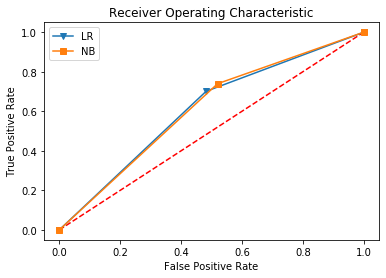

In [34]:
# Plot the ROC curve for the model
from sklearn.metrics import roc_curve, auc
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_LR)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_pred_NB)

plt.plot([0,1], [0,1], 'r--')
plt.plot(lr_fpr, lr_tpr, marker='v', label='LR')
plt.plot(nb_fpr, nb_tpr, marker='s', label='NB')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

From our results, we conclude that "Naive Bayes" is the best model to predict the "sex" variable. 

## **Modeling-Predicting Age**

In [35]:
Y=df['age']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Random Forest Regressor 
We trained the dataset with Linear Regression model and Random Forest Regressor and Random Forest Regressor returns lower mean square error.

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor_RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_RFR.fit(X_train , Y_train)
Y_pred_RFR = regressor_RFR.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred_RFR)

176.63667660654625

## **Test Set**

In [43]:
test = pd.read_csv('/test.csv', nrows = 50000)

### Cleaning test set

In [44]:
test.isnull().sum()

ID              0
keywords     5460
age         50000
sex         50000
dtype: int64

In [45]:
test.dropna(subset=['keywords'], inplace=True)

In [46]:
test.columns

Index(['ID', 'keywords', 'age', 'sex'], dtype='object')

In [47]:
test["keywords"].dtypes

dtype('O')

In [48]:
test["Full_List"] = test["keywords"].apply(processing)

In [49]:
Full_List_t=test["Full_List"]

In [50]:
Full_List_t = Full_List_t.astype(str)

In [51]:
del test['keywords']

In [53]:
vc_tf_idf_test = TfidfVectorizer(max_features=30000) 
X_testset = vc_tf_idf_test.fit_transform(Full_List_t).toarray()

In [54]:
X_testset.shape

(44540, 30000)

### Prediction

In [55]:
# Predicting sex using Naive Bayes on the test dataset
prediction_sex=classifier_NB.predict(X_testset)
prediction_sex

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [56]:
# Predicting age using Random Forest Regressor on the test dataset
prediction_age=regressor_RFR.predict(X_testset)
prediction_age

array([42.02405863, 41.71548756, 41.63617399, ..., 41.63617399,
       41.63617399, 41.63617399])

### Converting to Table

In [57]:
result = {'id': test['ID'], 'sex': prediction_sex, 'age': prediction_age}
Table = pd.DataFrame(result, columns = ['id', 'sex', 'age'])

In [58]:
#Coverting dummy variable to "M" and "F"
Table.sex.replace([1, 0], ['M', 'F'], inplace=True)

In [59]:
Table.age = Table['age'].round(decimals=0)
Table.head()

,id,sex,age
1,2,F,42.0
2,3,F,42.0
3,4,M,42.0
4,5,F,37.0
5,6,F,51.0


In [60]:
Table.to_csv("table.csv")